## Searching the Target

The target is a red disk on the floor. The robot should approach the disk, and gently leave the ball on top of it.

In [8]:
import packages.initialization
import pioneer3dx as p3dx
p3dx.init()

You can use the same strategy for searching the disk, since it can also be detected by color (in this case, red).

In fact, the code for the segmentation function is exactly the same (only the `lower` and `upper` values will change).

In [9]:
import cv2
def color_blob():
    hsv = cv2.cvtColor(p3dx.image, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    M = cv2.moments(mask)
    area = M['m00']
    if area > 0:
        cx = int(M['m10']/area)
        cy = int(M['m01']/area)
    else:
        cx = None
        cy = None
    return area, cx, cy

These are the values for segmenting red pixels in the image.

In [10]:
import numpy
lower = numpy.array([ 0, 100, 100])
upper = numpy.array([ 10, 255, 255])

In [11]:
p3dx.tilt(0.0)

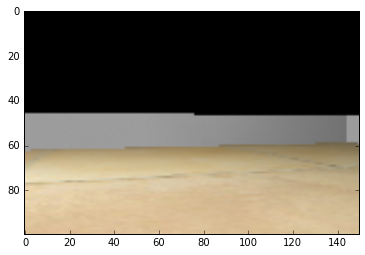

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(p3dx.image);

## Turning

The following code is exactly the same as that used in the search for the ball. The robot will turn until the target is centered in the image.

In [12]:
def is_blob_centered():
    area, cx, cy = color_blob()
    if area > 0 and cx >= 70 and cx < 80:
        return True
    else:
        return False

In [13]:
while not is_blob_centered():
    p3dx.move(-0.3,0.3)
p3dx.stop()

In [ ]:
plt.imshow(p3dx.image);

## Approaching

Copy and paste the code from the appraoch step of the ball-searching notebook.

In [23]:
def is_blob_close():
    area, cx, cy = color_blob()
    if area > 0 and cy >= 90:
        return True
    else:
        return False

In [15]:
while not is_blob_close():
    p3dx.move(1.0,1.0)
p3dx.stop()

In [ ]:
plt.imshow(p3dx.image);

## Fine adjustment
Again, it might be necessary an additional step for finely reaching the final position. Usually, only translation is necessary, no need for rotation.

In [16]:
p3dx.tilt(-0.47)

In [17]:
while not is_blob_close():
    p3dx.move(1.0,1.0)
p3dx.stop()

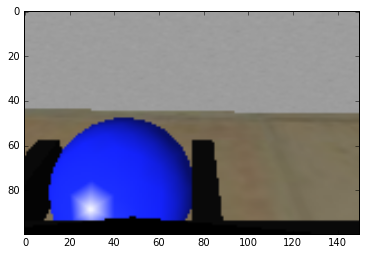

In [18]:
plt.imshow(p3dx.image);

## Releasing the ball

Copy and paste the statements from the grasping notebook that lower the gripper and open the fingers. Finally move the robot backwards.

In [19]:
p3dx.gripper(0.05,0.0)

In [20]:
p3dx.gripper(0.05,0.1)

In [21]:
p3dx.gripper(-0.05,0.1)

In [22]:
p3dx.move(-1.0,-1.0)
p3dx.sleep(3)
p3dx.stop()

Next: [Complete Manipulation Task](Complete%20Task.ipynb)

---
#### Try-a-Bot: an open source guide for robot programming
Developed by:
[![Robotic Intelligence Lab @ UJI](img/logo/robinlab.png "Robotic Intelligence Lab @ UJI")](http://robinlab.uji.es)

Sponsored by:
<table>
<tr>
<td style="border:1px solid #ffffff ;">
<a href="http://www.ieee-ras.org"><img src="img/logo/ras.png"></a>
</td>
<td style="border:1px solid #ffffff ;">
<a href="http://www.cyberbotics.com"><img src="img/logo/cyberbotics.png"></a>
</td>
<td style="border:1px solid #ffffff ;">
<a href="http://www.theconstructsim.com"><img src="img/logo/theconstruct.png"></a>
</td>
</tr>
</table>

Follow us:
<table>
<tr>
<td style="border:1px solid #ffffff ;">
<a href="https://www.facebook.com/RobotProgrammingNetwork"><img src="img/logo/facebook.png"></a>
</td>
<td style="border:1px solid #ffffff ;">
<a href="https://www.youtube.com/user/robotprogrammingnet"><img src="img/logo/youtube.png"></a>
</td>
</tr>
</table>